In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube-nocookie.com/embed/UcrSxU-cJ4g", width=1920/4, height=1080/4)
#<iframe width="560" height="315" src="https://www.youtube.com/embed/szdDfF796xg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

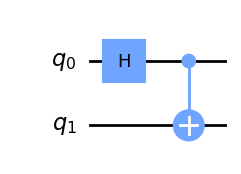

In [3]:
import qiskit
from qiskit_experiments.library import StateTomography

qc = qiskit.QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')

In [5]:
st = StateTomography(qc)

from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeAthens
backend = AerSimulator.from_backend(FakeAthens()) # noisy

from qiskit.visualization import array_to_latex

stdata = st.run(backend).block_for_results()
st_res = stdata.analysis_results('state')
array_to_latex(st_res.value) #density matrix object

<IPython.core.display.Latex object>

In [6]:
fid = stdata.analysis_results('state_fidelity')
print(fid)

AnalysisResult
- name: state_fidelity
- value: 0.9613296613866614
- device_components: ['Q0', 'Q1']
- verified: False


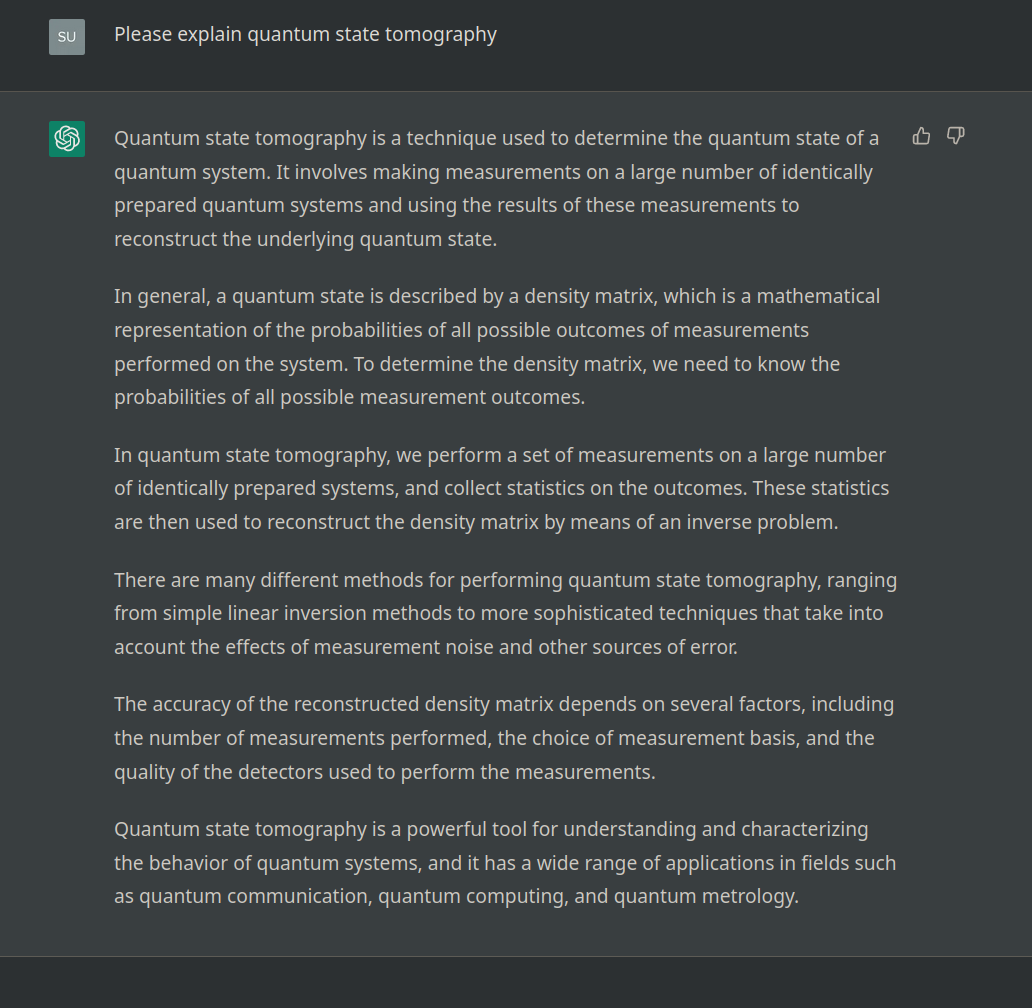

In [10]:
from IPython.display import Image
Image(filename='qst_chatgpt_2023-02-10_16-12.png')
# ChatGPT on quantum state tomography

In [27]:
bad_data = st.run(backend, shots=3, seed_simulation=100).block_for_results()
bad_state_result = bad_data.analysis_results("state")

# Print result
print(bad_state_result)

# Show extra data
bad_state_result.extra

AnalysisResult
- name: state
- value: DensityMatrix([[ 0.24519107+0.00000000e+00j,  0.08608741-1.05249449e-01j,
                -0.01897229+2.76860421e-02j,  0.23584835-1.45136063e-01j],
               [ 0.08608741+1.05249449e-01j,  0.15457168+0.00000000e+00j,
                -0.0041211 -8.40896487e-02j,  0.22913776-3.79584141e-02j],
               [-0.01897229-2.76860421e-02j, -0.0041211 +8.40896487e-02j,
                 0.09992141-1.73472348e-18j,  0.07615654+5.94502224e-02j],
               [ 0.23584835+1.45136063e-01j,  0.22913776+3.79584141e-02j,
                 0.07615654-5.94502224e-02j,  0.50031583+0.00000000e+00j]],
              dims=(2, 2))
- extra: <5 items>
- device_components: ['Q0', 'Q1']
- verified: False


{'trace': 1.000000000000005,
 'eigvals': array([0.79803804, 0.20196196, 0.        , 0.        ]),
 'raw_eigvals': array([ 1.07614547,  0.48006939, -0.01756072, -0.53865414]),
 'rescaled_psd': True,
 'fitter_metadata': {'fitter': 'linear_inversion',
  'fitter_time': 0.0012173652648925781}}

In [28]:
fid = bad_data.analysis_results('state_fidelity')
print(fid)

AnalysisResult
- name: state_fidelity
- value: 0.6086018034239941
- device_components: ['Q0', 'Q1']
- verified: False


In [29]:
from qiskit.tools.jupyter import *
%qiskit_version_table